In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gsdmm import MovieGroupProcess
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download the NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IBoudellioua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IBoudellioua\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IBoudellioua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the data
data = pd.read_csv('Score_Alldata.csv')

In [3]:
# Define score categories
score_categories = {
    '0-6': (0, 6),
    '7-8': (7, 8),
    '9-10': (9, 10)
}

# Define columns to process
columns_to_process = ['Reason', 'Improvement']

In [4]:
# GSDMM parameters
K = 1  
alpha = 0.1
beta = 0.1
n_iters = 30

In [5]:
# Function to clean and tokenize text data
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    text = re.sub(r"[^\w\s]", "", text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Function to train GSDMM model
def train_gsdmm(data, K, alpha, beta, n_iters):
    mgp = MovieGroupProcess(K=K, alpha=alpha, beta=beta, n_iters=n_iters)
    y = mgp.fit(data, len(set([word for words_list in data for word in words_list])))
    return mgp

# Function to display word cloud
def display_wordcloud(sorted_topic, score_category, title):
    wordcloud = WordCloud(background_color="white", max_words=20)
    wordcloud.generate_from_frequencies(dict(sorted_topic[:20]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Score category {score_category}: Top words in {title} column")
    plt.show()

# Function to display bar chart    
def display_bar_chart(sorted_topic, score_category, title):
    words = [word for word, freq in sorted_topic[:20]]
    frequencies = [freq for word, freq in sorted_topic[:20]]
    plt.figure(figsize=(10, 5))
    plt.bar(words, frequencies)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(f"Score category {score_category}: Top words in {title} column")
    plt.xticks(rotation=90)
    plt.show()

Reason column:

Score category: 0-6


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_3460\2982362315.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]


In stage 0: transferred 0 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated
In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated
In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated
In stage 15: transferred 0 clusters with 1 clusters populated
In stage 16: trans

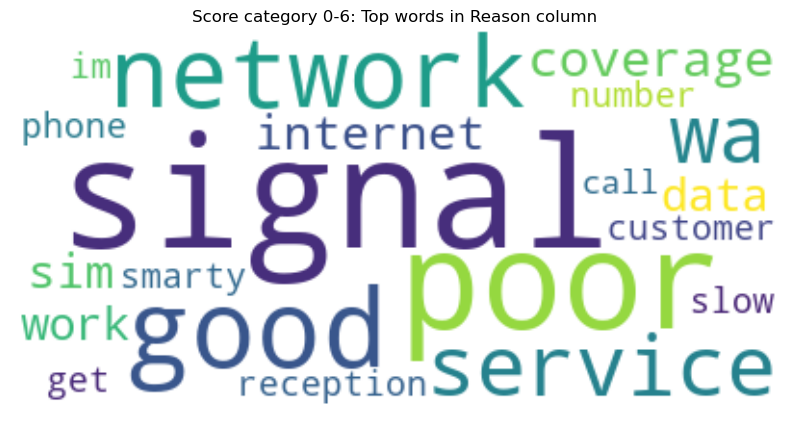

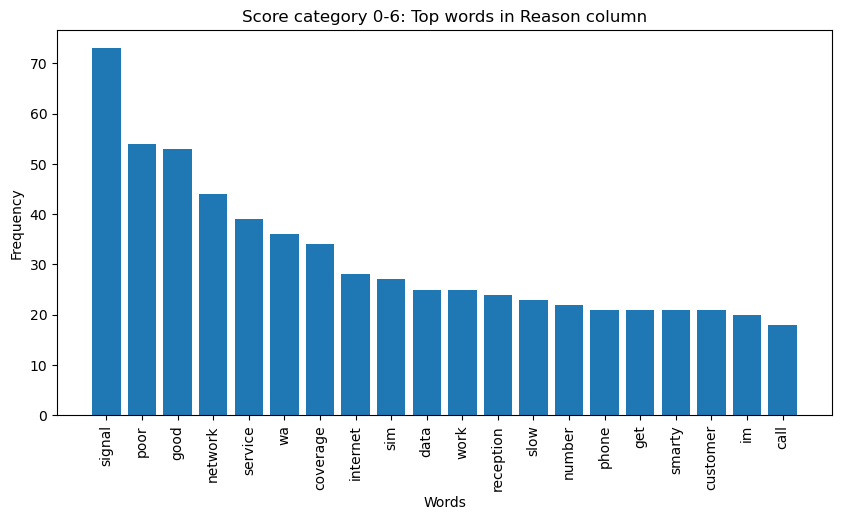


Score category: 7-8
In stage 0: transferred 0 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_3460\2982362315.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]


In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated
In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated
In stage 15: transferred 0 clusters with 1 clusters populated
In stage 16: transferred 0 clusters with 1 clusters populated
In stage 17: transferred 0 clusters with 1 clusters populated
In stage 18: transferred 0 clusters with 1 clusters populated
In stage 19: transferred 0 clusters with 1 clusters populated
In stage 20: transferred 0 clusters with 1 clusters populated
In stage 21: transferred 0 clusters with 1 clusters populated
In stage 22: transferred 0 clusters with 1 clusters populated
In stage 23: transferred 0 clusters with 1 clusters populated
In stage 24: transferred 0 clusters with 1 clusters populated
In stage 

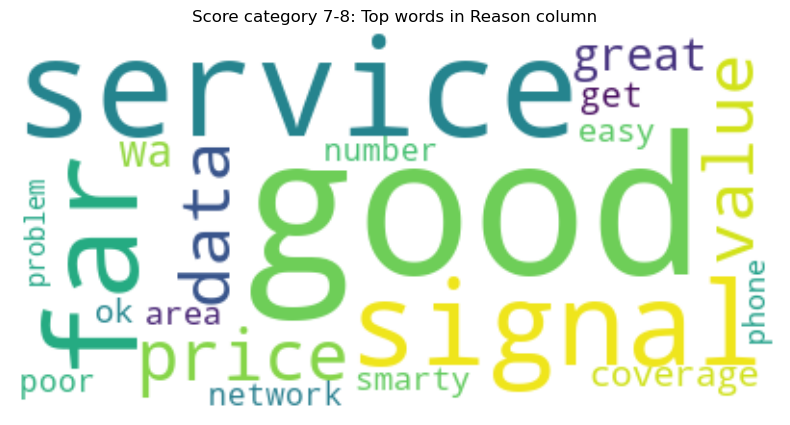

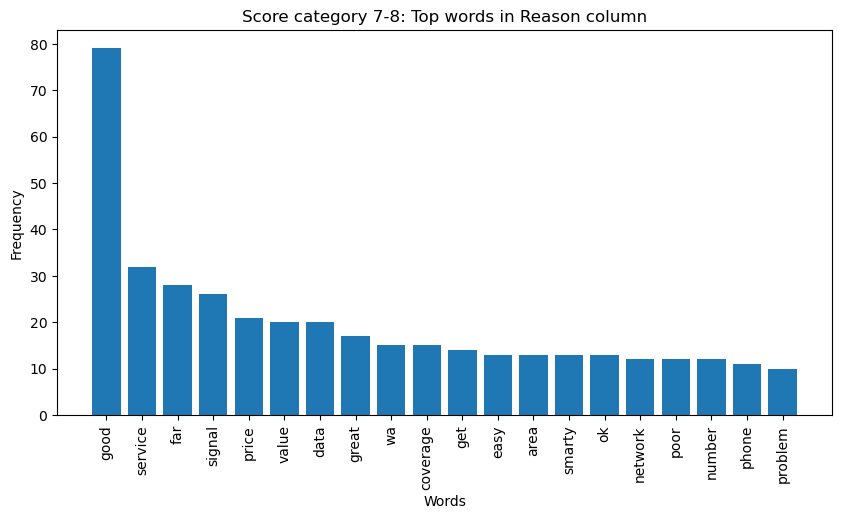


Score category: 9-10


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_3460\2982362315.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]


In stage 0: transferred 0 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated
In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated
In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated
In stage 15: transferred 0 clusters with 1 clusters populated
In stage 16: trans

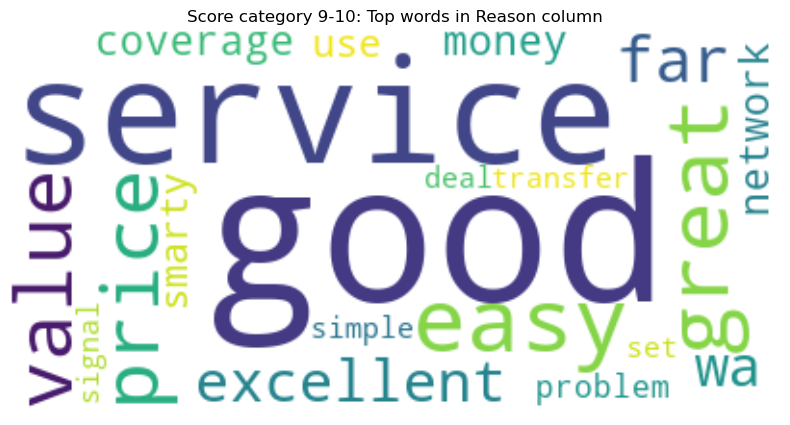

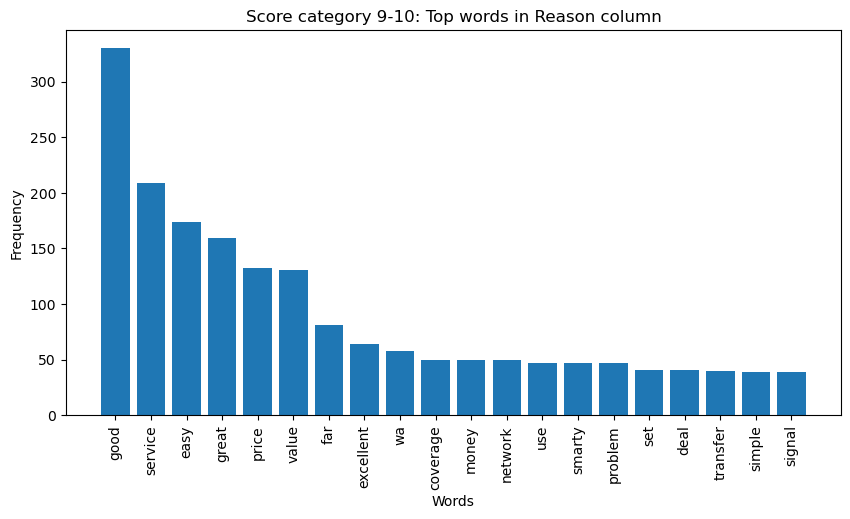

Improvement column:

Score category: 0-6
In stage 0: transferred 0 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated
In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_3460\2982362315.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]


In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated
In stage 15: transferred 0 clusters with 1 clusters populated
In stage 16: transferred 0 clusters with 1 clusters populated
In stage 17: transferred 0 clusters with 1 clusters populated
In stage 18: transferred 0 clusters with 1 clusters populated
In stage 19: transferred 0 clusters with 1 clusters populated
In stage 20: transferred 0 clusters with 1 clusters populated
In stage 21: transferred 0 clusters with 1 clusters populated
In stage 22: transferred 0 clusters with 1 clusters populated
In stage 23: transferred 0 clusters with 1 clusters populated
In stage 24: transferred 0 clusters with 1 clusters populated
In stage 25: transferred 0 clusters with 1 clusters populated
In stage 26: transferred 0 clusters with 1 clusters populated
Converged.  Breaking out.
Top words and their frequencies:
improve: 63

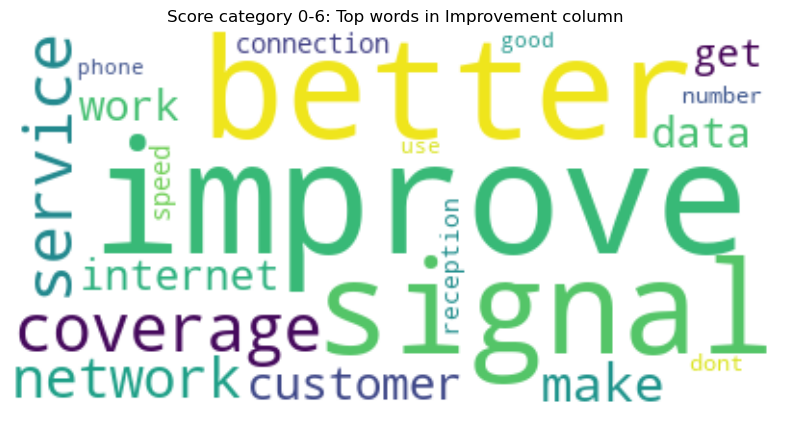

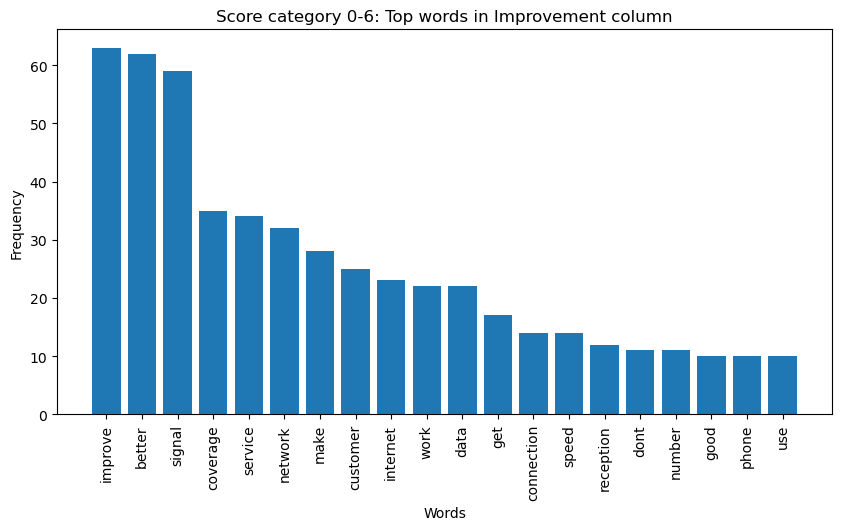


Score category: 7-8
In stage 0: transferred 0 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated
In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated
In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_3460\2982362315.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]


In stage 15: transferred 0 clusters with 1 clusters populated
In stage 16: transferred 0 clusters with 1 clusters populated
In stage 17: transferred 0 clusters with 1 clusters populated
In stage 18: transferred 0 clusters with 1 clusters populated
In stage 19: transferred 0 clusters with 1 clusters populated
In stage 20: transferred 0 clusters with 1 clusters populated
In stage 21: transferred 0 clusters with 1 clusters populated
In stage 22: transferred 0 clusters with 1 clusters populated
In stage 23: transferred 0 clusters with 1 clusters populated
In stage 24: transferred 0 clusters with 1 clusters populated
In stage 25: transferred 0 clusters with 1 clusters populated
In stage 26: transferred 0 clusters with 1 clusters populated
Converged.  Breaking out.
Top words and their frequencies:
better: 40
signal: 23
know: 20
data: 20
improve: 17
coverage: 16
sure: 15
dont: 15
speed: 15
make: 13
good: 13
time: 12
number: 12
internet: 11
work: 11
sim: 10
phone: 10
network: 9
call: 9
service

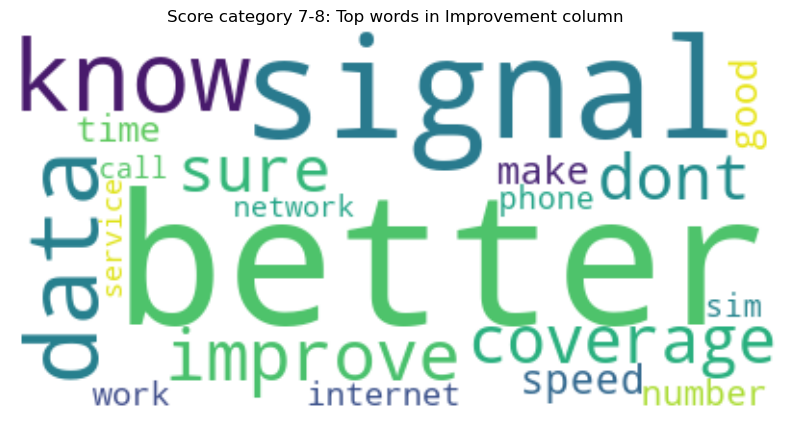

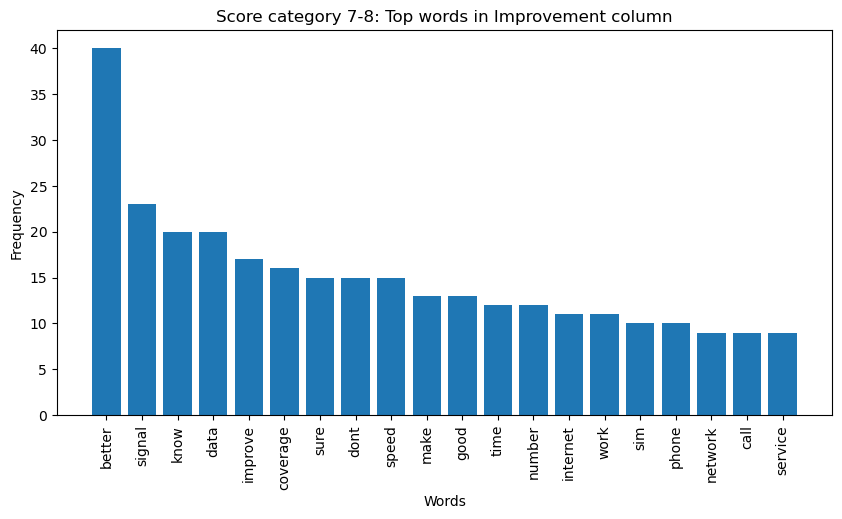


Score category: 9-10


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_3460\2982362315.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]


In stage 0: transferred 0 clusters with 1 clusters populated
In stage 1: transferred 0 clusters with 1 clusters populated
In stage 2: transferred 0 clusters with 1 clusters populated
In stage 3: transferred 0 clusters with 1 clusters populated
In stage 4: transferred 0 clusters with 1 clusters populated
In stage 5: transferred 0 clusters with 1 clusters populated
In stage 6: transferred 0 clusters with 1 clusters populated
In stage 7: transferred 0 clusters with 1 clusters populated
In stage 8: transferred 0 clusters with 1 clusters populated
In stage 9: transferred 0 clusters with 1 clusters populated
In stage 10: transferred 0 clusters with 1 clusters populated
In stage 11: transferred 0 clusters with 1 clusters populated
In stage 12: transferred 0 clusters with 1 clusters populated
In stage 13: transferred 0 clusters with 1 clusters populated
In stage 14: transferred 0 clusters with 1 clusters populated
In stage 15: transferred 0 clusters with 1 clusters populated
In stage 16: trans

In [ ]:
# Main loop to process each column and score category
for column in columns_to_process:
    print(f"{column} column:")
    for score_category, score_range in score_categories.items():
        print(f"\nScore category: {score_category}")
        category_data = data[data['Score'].between(score_range[0], score_range[1], inclusive=True)]
        category_data = category_data.dropna(subset=[column])
        category_data['tokens'] = category_data[column].apply(clean_and_tokenize)
        mgp = train_gsdmm(category_data['tokens'].tolist(), K, alpha, beta, n_iters)
        tokens = category_data.iloc[0]['tokens']
        doc_topic = mgp.choose_best_label(tokens)
        sorted_topic = sorted(mgp.cluster_word_distribution[doc_topic[0]].items(), key=lambda x: x[1], reverse=True)

        # Display top words along with their frequencies
        print("Top words and their frequencies:")
        for word, freq in sorted_topic[:20]:
            print(f"{word}: {freq}")

        # Prepare topics for coherence model
        topics = [[word for word, freq in mgp.cluster_word_distribution[topic_id].items()] for topic_id in range(K)]
        dictionary = Dictionary(category_data['tokens'].tolist())
        texts = category_data['tokens'].tolist()
        corpus = [dictionary.doc2bow(text) for text in texts]
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        print('\nCoherence Score:', coherence_score)

        # Display the word cloud and bar chart
        display_wordcloud(sorted_topic, score_category, column)
        display_bar_chart(sorted_topic, score_category, column)